In [164]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

Remember: 500 solar masses is the mass per particle

# THIS PART WORKS WITH NO_RT

In [165]:
전data290_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0290.txt")
dx290_noRT = 전data290_noRT[:,4]
dy290_noRT = 전data290_noRT[:,5]
dz290_noRT = 전data290_noRT[:,6]
r290_noRT = np.sqrt(dx290_noRT**2 + dy290_noRT**2 + dz290_noRT**2) # max: 11333.935323605565 pc, closest to 11340
rad_array290_noRT = np.arange(10, 11340, 10, dtype=np.int64) # unit: pc
density_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
i = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT > radius_value) & (r290_noRT < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile290_noRT[i] = how_many_particles / shell_volume
    i += 1
densityprof290_noRT = density_profile290_noRT / density_profile290_noRT[1]

In [166]:
# pick a halo mass, change the concentration

halo6 = NFW(1.903021e+08)
r_s6 = halo6.r_s()
c_vir6 = halo6.c_vir()
print('r_s =', r_s6)
print('c_vir =', c_vir6)

radius6 = np.arange(0.01, 11.34, 0.01) #unit: kpc

r_s = 0.8022370070865281
c_vir = 18.746949585500463


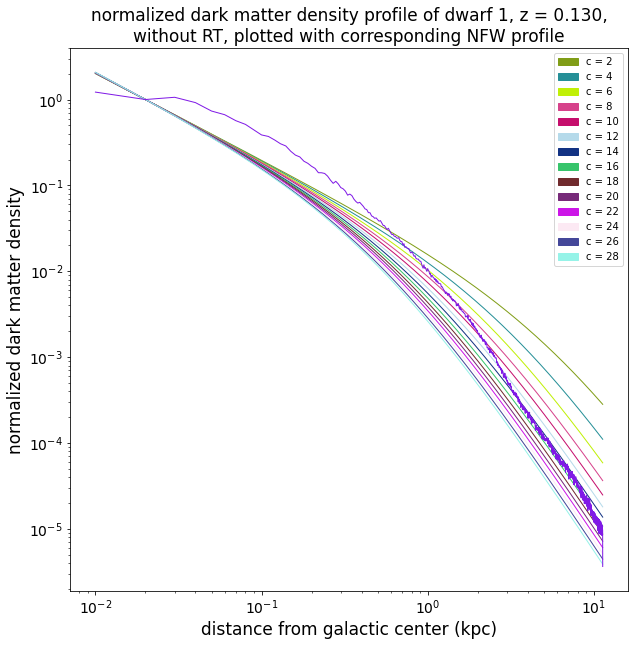

In [167]:
# best fit attempt 1, NORMALIZED

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in range(2, 30, 2):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile6 = halo6.rho(radius6, c_value)
    NFWdensityprof_noRT = density_profile6 / density_profile6[1]
    plt.plot(radius6, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(c_value))
    all_the_legends.append(each_legend)

plt.plot(radius6, densityprof290_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\nwithout RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

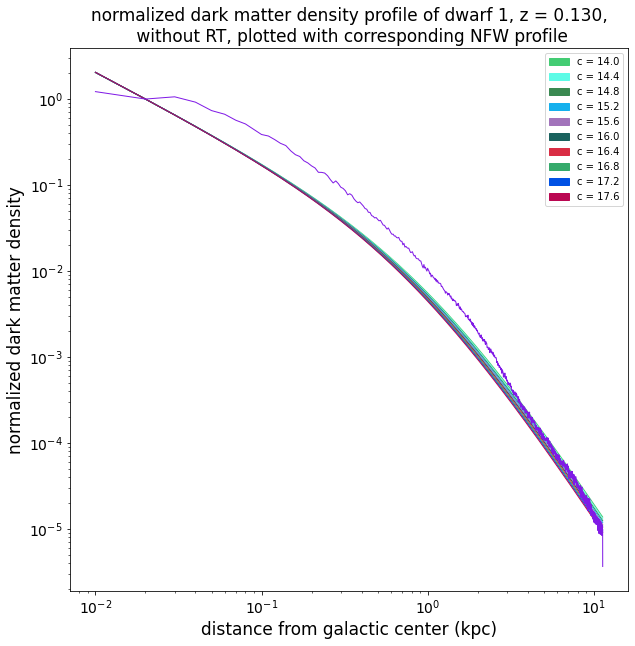

In [168]:
# best fit attempt 2, NORMALIZED

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in np.arange(14, 18, 0.4):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile6 = halo6.rho(radius6, c_value)
    NFWdensityprof_noRT = density_profile6 / density_profile6[1]
    plt.plot(radius6, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(round(c_value, 1)))
    all_the_legends.append(each_legend)

plt.plot(radius6, densityprof290_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(10**0,10**1.05)
#plt.ylim(10**-5,10**-2)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

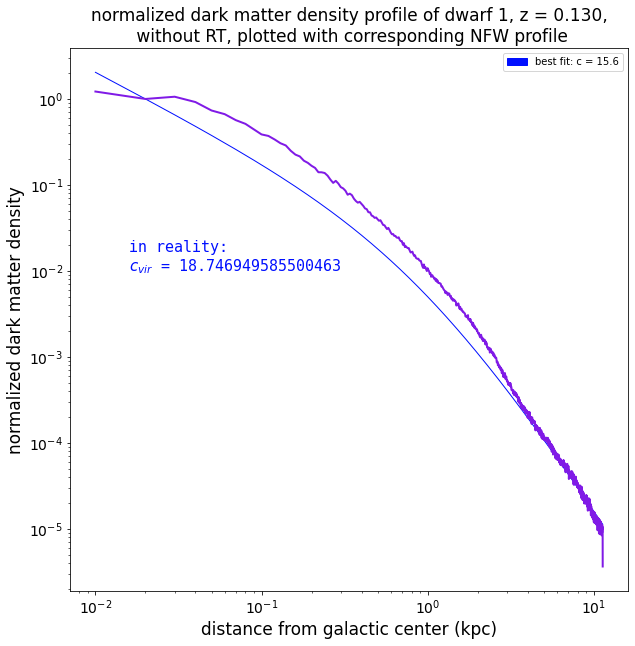

In [169]:
# plotting the best fit, NORMALIZED

plt.figure(figsize=(10,10))

density_profile6 = halo6.rho(radius6, c=15.6)
NFWdensityprof_noRT = density_profile6 / density_profile6[1]
plt.plot(radius6, NFWdensityprof_noRT, color='#000FFF', linewidth=1)
legend = mpatches.Patch(color='#000FFF', label='best fit: c = 15.6')

plt.plot(radius6, densityprof290_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=2)
    
plt.legend(handles=[legend], loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.text(10**-1.8, 10**-2, '''in reality:\n$c_{vir}$ = 18.746949585500463''', \
         fontsize=15, color='#000FFF', fontfamily='monospace')

plt.show()

(array([629], dtype=int64),)


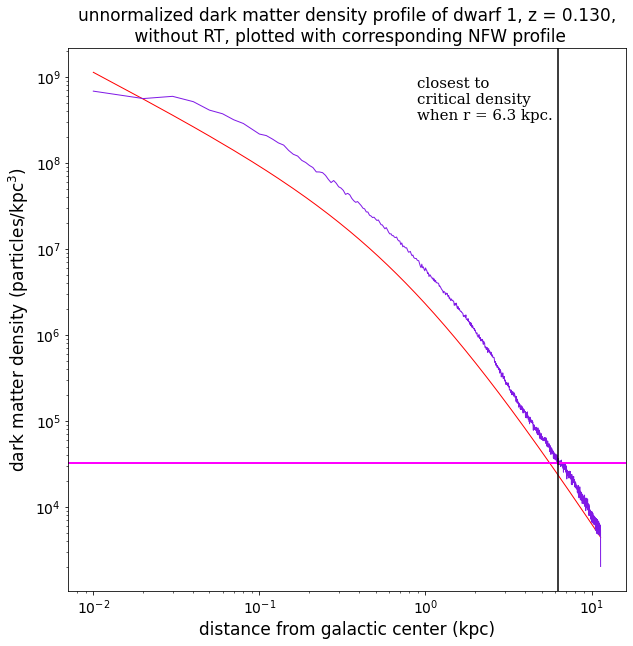

In [192]:
# plotting the best fit, UNNORMALIZED

dx290_noRT = 전data290_noRT[:,4] / 1000 # converting pc to kpc
dy290_noRT = 전data290_noRT[:,5] / 1000 # converting pc to kpc
dz290_noRT = 전data290_noRT[:,6] / 1000 # converting pc to kpc
r290_noRT = np.sqrt(dx290_noRT**2 + dy290_noRT**2 + dz290_noRT**2) # max: 11.333935323605565 pc, closest to 11.340 pc
rad_array290_noRT = np.arange(0.01, 11.34, 0.01) # unit: kpc

density_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
i = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT > radius_value) & (r290_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile290_noRT[i] = how_many_particles / shell_volume
#    print(density_profile290_noRT[i])
    i += 1

rho_crit = 200 * 161.7
deviation_from_rho_crit = abs(density_profile290_noRT * 500 - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
result = "closest to\ncritical density\nwhen r = " + str(rad_array290_noRT[index][0]) + " kpc."

density_profile6 = halo6.rho(radius6)

plt.figure(figsize=(10, 10))
plt.plot(radius6, density_profile6, color='red', linewidth=1)
plt.plot(radius6, density_profile290_noRT * 500, color=(0.5, 0.1, 0.9, 1), linewidth=1)
plt.axhline(rho_crit, color='#FF00FF', linewidth=2)
plt.axvline(rad_array290_noRT[index], color='black')       
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('unnormalized dark matter density profile of dwarf 1, z = 0.130,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.text(10**-0.05, 10**8.5, result, \
         fontsize=15, color='black', fontfamily='serif')

plt.show()

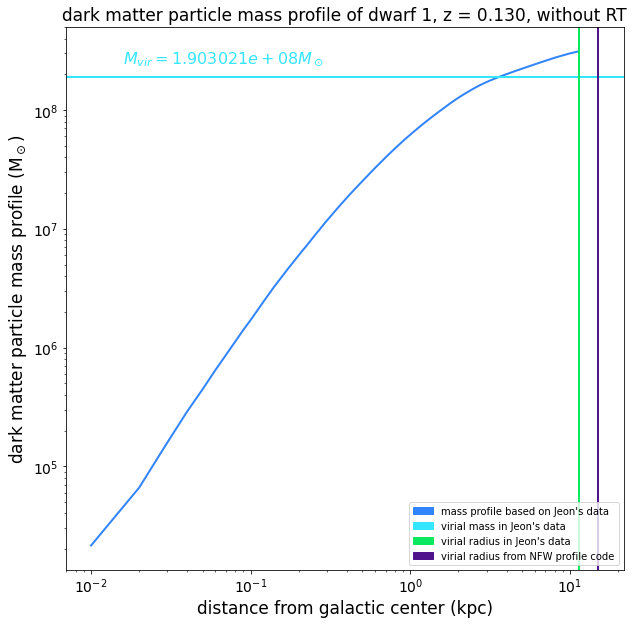

In [120]:
# plotting the mass profile at this redshift

mass_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
h = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    mass_profile290_noRT[h] = how_many_particles * 500
    h += 1

plt.figure(figsize=(10,10))

plt.plot(radius6, mass_profile290_noRT, color='#3185FC', linewidth=2)
plt.axhline(1.903021e+08, color='#34E5FF', linewidth=2)
plt.axvline(1.133394e+04 * 0.001, color='#09E85E', linewidth=2)
plt.axvline(halo6.r_vir(), color='#4E148C', linewidth=2)
legend1 = mpatches.Patch(color='#3185FC', label="mass profile based on Jeon's data")
legend2 = mpatches.Patch(color='#34E5FF', label="virial mass in Jeon's data")
legend3 = mpatches.Patch(color='#09E85E', label="virial radius in Jeon's data")
legend4 = mpatches.Patch(color='#4E148C', label="virial radius from NFW profile code")

plt.legend(handles=[legend1, legend2, legend3, legend4], loc='lower right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)
plt.text(10**-1.8, 10**8.4, '''$M_{vir} = 1.903021e+08 M_\odot$''', \
         fontsize=16, color='#34E5FF')

plt.show()

# THIS PART WORKS WITH RT

In [77]:
전data290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0290.txt")
dx290 = 전data290[:,4]
dy290 = 전data290[:,5]
dz290 = 전data290[:,6]
r290 = np.sqrt(dx290**2 + dy290**2 + dz290**2) # max: 11415.825965662318, closest to 11420
rad_array290 = np.arange(10, 11420, 10, dtype=np.int64)
density_profile290 = np.zeros(np.size(rad_array290))
i = 0
for radius_value in rad_array290:
    particles = np.where((r290 > radius_value) & (r290 < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile290[i] = how_many_particles / shell_volume
    i += 1
densityprof290 = density_profile290 / density_profile290[1]

In [91]:
# pick a halo mass, change the concentration

halo7 = NFW(1.944113e+08)
r_s7 = halo7.r_s()
c_vir7 = halo7.c_vir()
print('r_s =', r_s7)
print('c_vir =', c_vir7)

radius7 = np.arange(0.01, 11.42, 0.01) #unit: kpc

r_s = 0.8092657818091061
c_vir = 18.716936511605343


In [79]:
mass_profile290 = np.zeros(np.size(rad_array290))
h = 0
for radius_value in rad_array290:
    particles = np.where((r290 < (radius_value + 10)))
    how_many_particles = np.size(particles)
    mass_profile290[h] = how_many_particles * 500
    h += 1

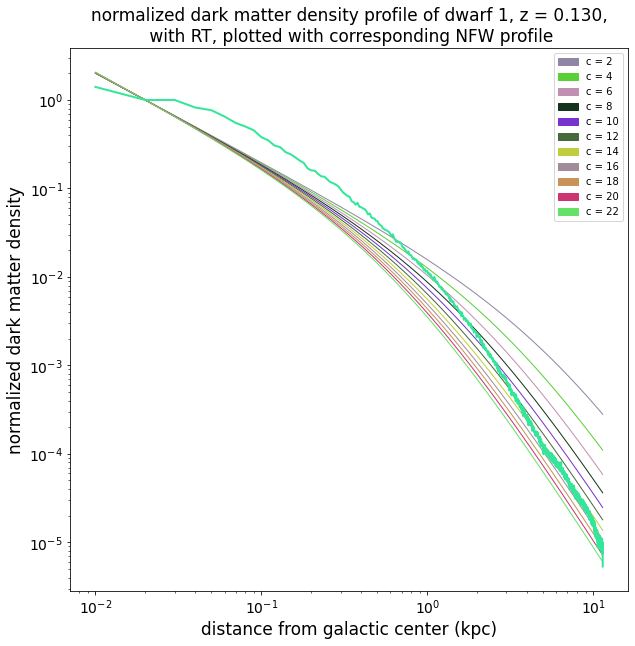

In [80]:
# best fit attempt 1, NORMALIZED

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in range(2, 24, 2):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile7 = halo7.rho(radius7, c_value)
    NFWdensityprof_noRT = density_profile7 / density_profile7[1]
    plt.plot(radius7, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(c_value))
    all_the_legends.append(each_legend)

plt.plot(radius7, densityprof290, color=(0.2, 0.9, 0.6, 1), linewidth=2)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

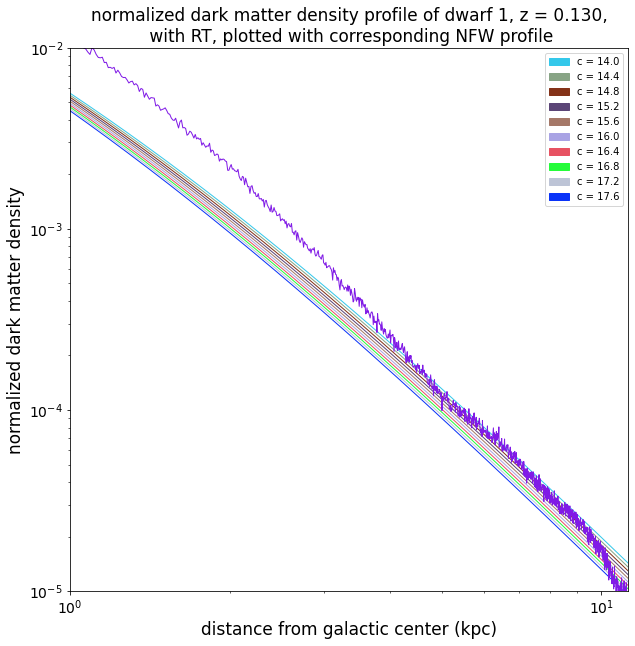

In [81]:
# best fit attempt 2, NORMALIZED

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in np.arange(14, 18, 0.4):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile7 = halo7.rho(radius7, c_value)
    NFWdensityprof = density_profile7 / density_profile7[1]
    plt.plot(radius7, NFWdensityprof, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(round(c_value, 1)))
    all_the_legends.append(each_legend)

plt.plot(radius7, densityprof290, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**0,10**1.05)
plt.ylim(10**-5,10**-2)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\n with RT, plotted with corresponding NFW profile' ,\
          loc='center', fontsize=17)

plt.show()

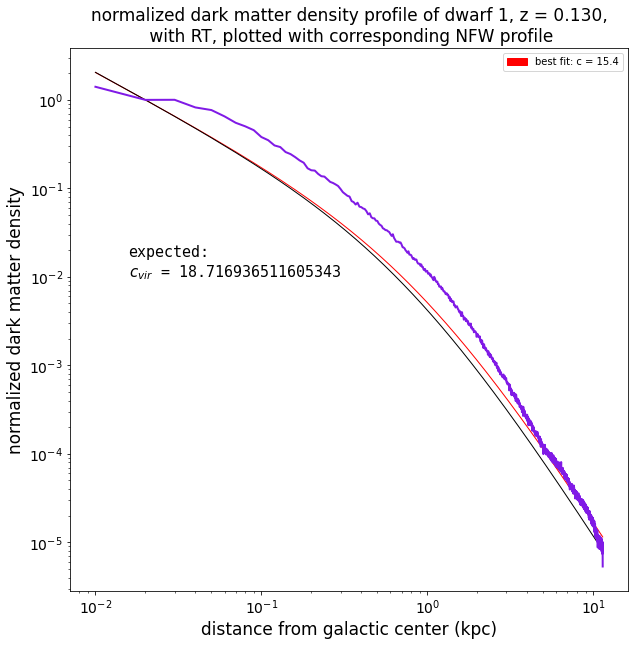

In [82]:
# plotting the best fit, NORMALIZED

plt.figure(figsize=(10,10))

density_profile7 = halo7.rho(radius7, c=15.4)
density_profile7_expected = halo7.rho(radius7)
NFWdensityprof = density_profile7 / density_profile7[1]
NFWdensityprof_expected = density_profile7_expected / density_profile7_expected[1]
plt.plot(radius7, NFWdensityprof, color='#FF0000', linewidth=1)
plt.plot(radius7, NFWdensityprof_expected, color='#000000', linewidth=1)
legend = mpatches.Patch(color='#FF0000', label='best fit: c = 15.4')

plt.plot(radius7, densityprof290, color=(0.5, 0.1, 0.9, 1), linewidth=2)
    
plt.legend(handles=[legend], loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.text(10**-1.8, 10**-2, '''expected:\n$c_{vir}$ = 18.716936511605343''', \
         fontsize=15, color='#000000', fontfamily='monospace')

plt.show()

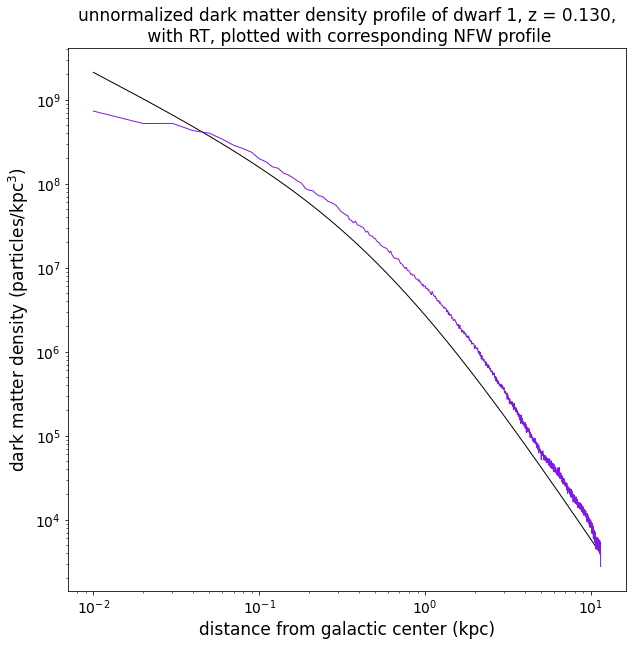

In [115]:
# plotting the best fit, UNNORMALIZED

dx290 = 전data290[:,4] / 1000 # converting data in pc to kpc
dy290 = 전data290[:,5] / 1000 # converting data in pc to kpc
dz290 = 전data290[:,6] / 1000 # converting data in pc to kpc
r290 = np.sqrt(dx290**2 + dy290**2 + dz290**2) # max: 11.415825965662318 kpc, closest to 11.42 kpc
rad_array290 = np.arange(0.01, 11.42, 0.01) # bin size: 0.01 kpc
density_profile290 = np.zeros(np.size(rad_array290))
i = 0
for radius_value in rad_array290:
    particles = np.where((r290 > radius_value) & (r290 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile290[i] = how_many_particles / shell_volume
    i += 1
    
density_profile6 = halo7.rho(radius7)

plt.figure(figsize=(10, 10))

plt.plot(radius7, density_profile7, color='black', linewidth=1)
plt.plot(radius7, density_profile290 * 500, color=(0.5, 0.1, 0.9, 1), linewidth=1)
        
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('unnormalized dark matter density profile of dwarf 1, z = 0.130,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

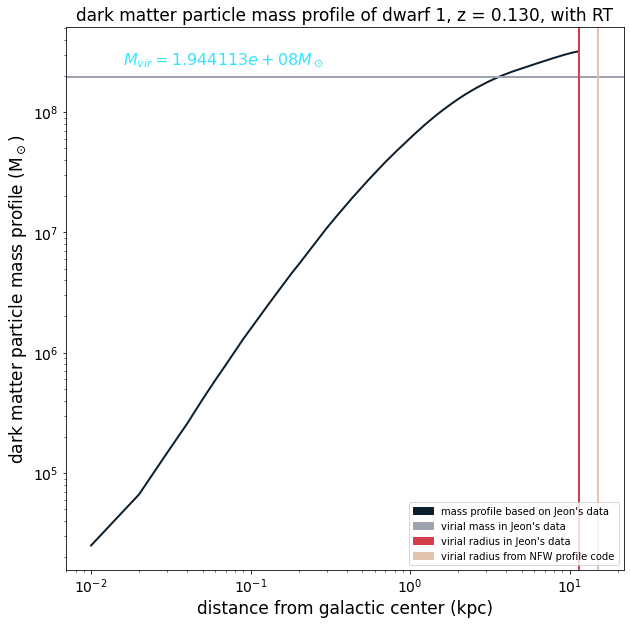

In [119]:
# plotting the mass profile at this redshift

mass_profile290 = np.zeros(np.size(rad_array290))
h = 0
for radius_value in rad_array290:
    particles = np.where((r290 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    mass_profile290[h] = how_many_particles * 500
    h += 1

plt.figure(figsize=(10,10))

plt.plot(radius7, mass_profile290, color='#0D1F2D', linewidth=2)
plt.axhline(1.944113e+08, color='#9EA3B0', linewidth=2)
plt.axvline(1.141584e+04 * 0.001, color='#D33F49', linewidth=2)
plt.axvline(halo7.r_vir(), color='#E4C3AD', linewidth=2)
legend1 = mpatches.Patch(color='#0D1F2D', label="mass profile based on Jeon's data")
legend2 = mpatches.Patch(color='#9EA3B0', label="virial mass in Jeon's data")
legend3 = mpatches.Patch(color='#D33F49', label="virial radius in Jeon's data")
legend4 = mpatches.Patch(color='#E4C3AD', label="virial radius from NFW profile code")

plt.legend(handles=[legend1, legend2, legend3, legend4], loc='lower right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 1, z = 0.130, with RT', loc='center', fontsize=17)
plt.text(10**-1.8, 10**8.4, '''$M_{vir} = 1.944113e+08 M_\odot$''', \
         fontsize=16, color='#34E5FF')

plt.show()